<a href="https://colab.research.google.com/github/Anurag-Gade/OpenCV-Notes/blob/main/Object_Detection_(Part_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Template Matching**

This is one of the most simplified for of object detection. The way it works is a provided template is slided across the image. The way you are making that comparision is based on some type of correlation.

A huge disadvantage of Template Matching is that, you already must have the exact image that you are looking for, which is not the "generalized object detection" that we want to do. The template will be slided on the main image, and the match can be found.

Here we have different types of enumerations:

Please note that, T denotes template, I denotes image, and R denotes result (M is the mask which is optional).

1) TM_SQDIFF (Square Difference Matching Method): Such methods will match the squared difference. The ideal match will be 0, and a bad match would be large.

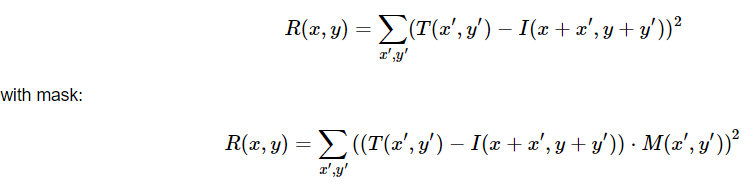

2) TM_SQDIFF_NORMED (Normalized Square Difference Matching Method):
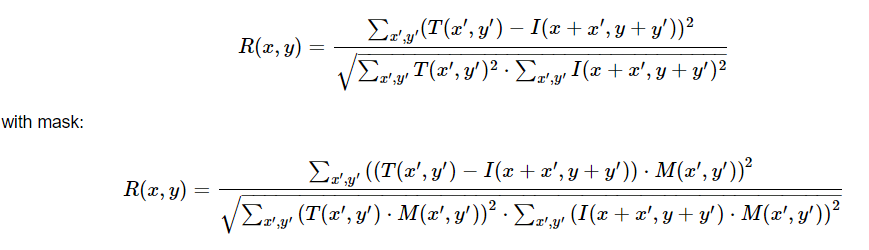

3) TM_CCORR (Correlation Matching Method): Such methods would multiplicatively match the template against the image, hence a perfect match would be large, and bad matches would be small or 0.
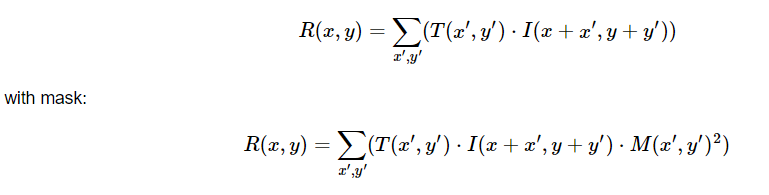


4) TM_CCORR_NORMED (Normalized Correlation Matching Method):
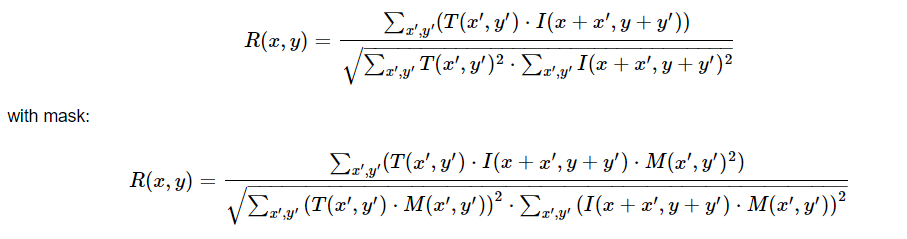

5) TM_CCOEFF (Correlation Coefficient Matching Method): Such methods would match a template which is relative to its mean. A perfect match would be 1, a perfect mismatch would be -1, and random alignments which imply no correlation whatsoever would be 0.

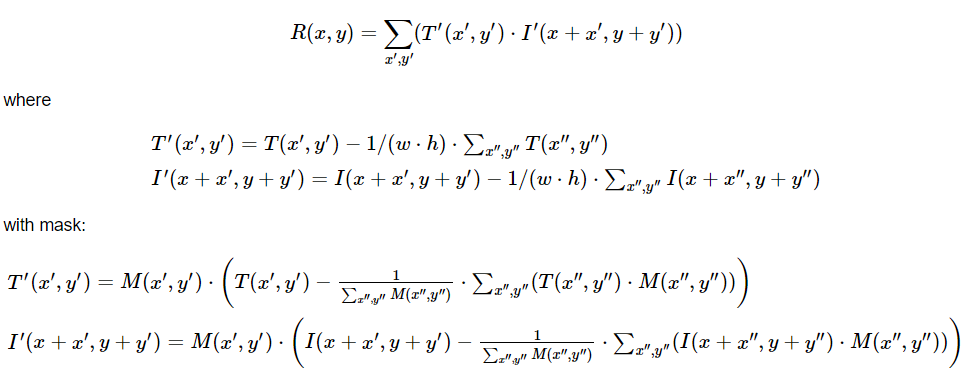

6) TM_CCOEFF_NORMED (Normalized Correlation Coefficient Matching Method): 
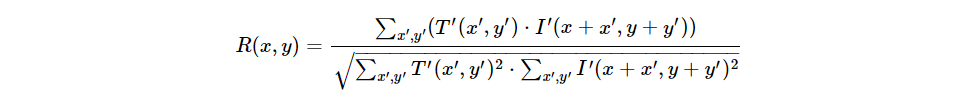

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab.patches import cv2_imshow


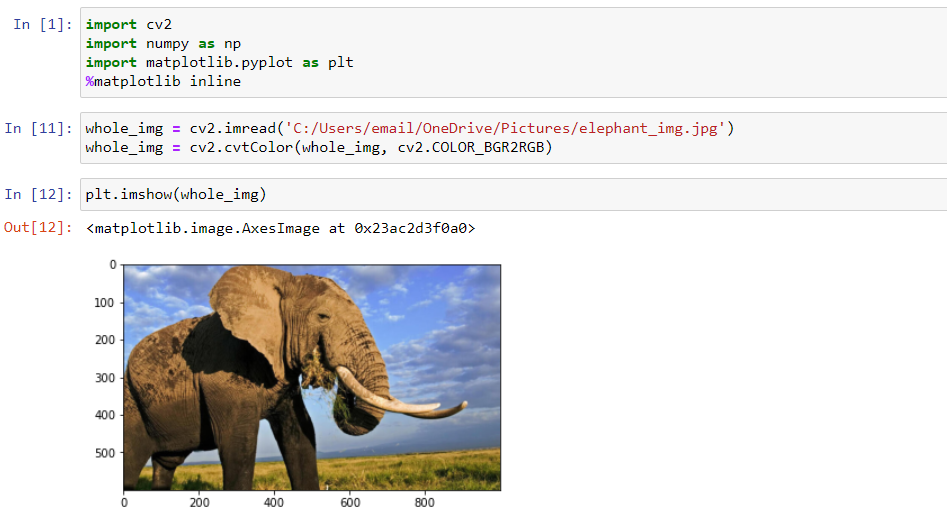

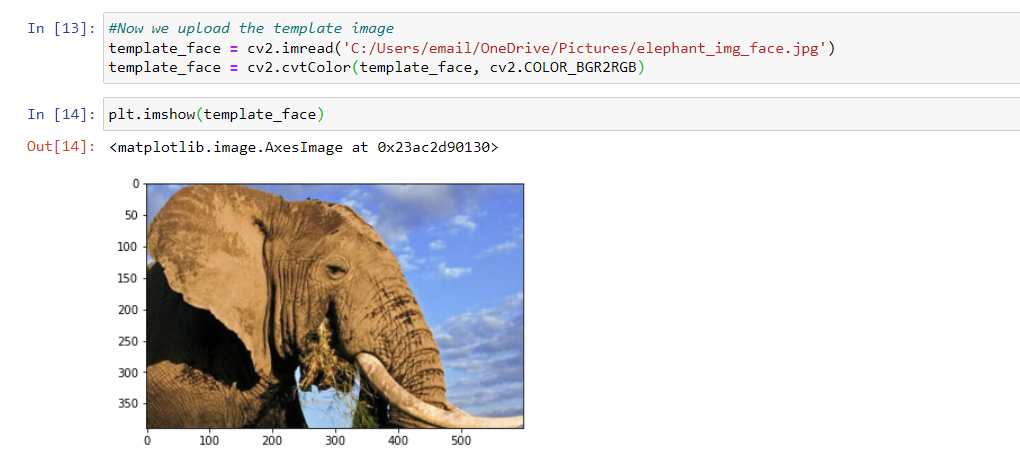

cv2.matchTemplate(full,template,method) does is it slides the template image over the larger image, and compares them using the comparision methods I have listed above. Below is a sample as to how this works. So, we have used the TM_SQDIFF method. As you can notice, we get a heatmap. The yellowish (the lighter region), indicates that there exists a good amount of overlapping or correlation, in that region.

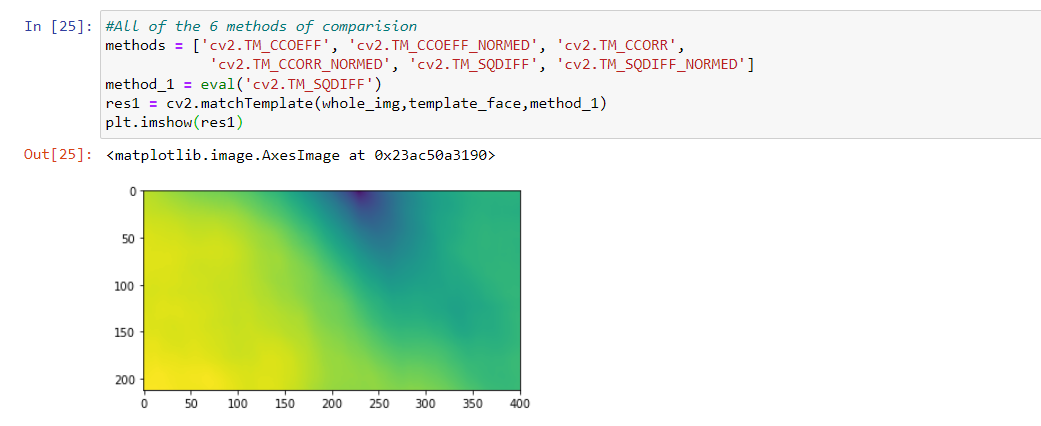

The cv2.minMaxLoc, takes in the heatmap, and returns us the locations at which the correlation is maximum or minimum. Let us try to plot a rectangle at the location at which it is maximum.

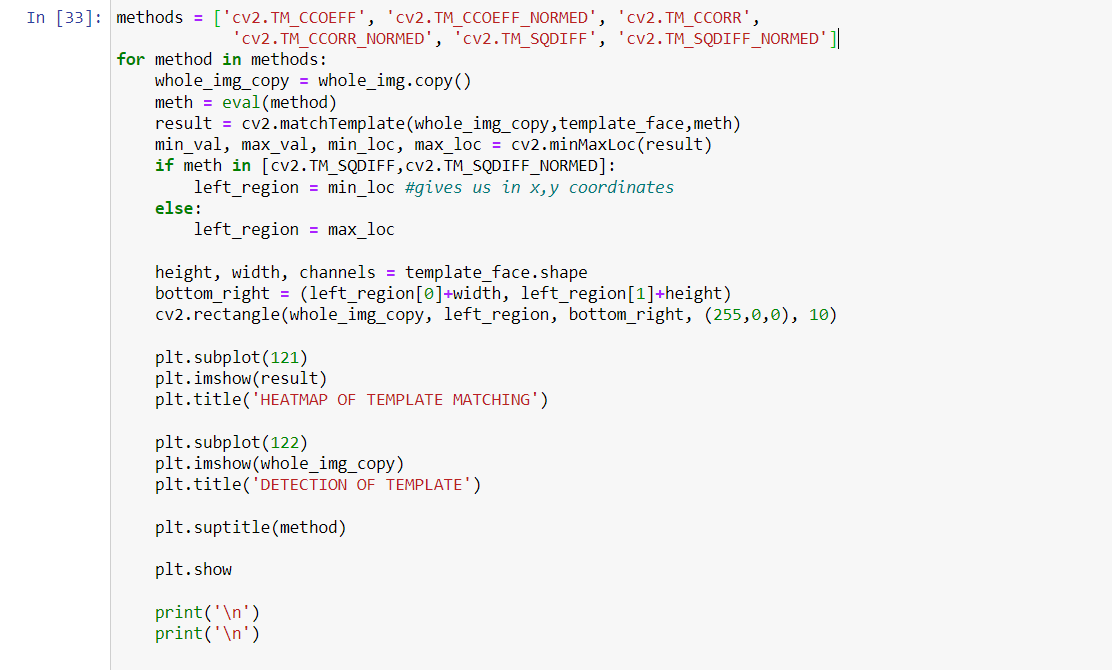

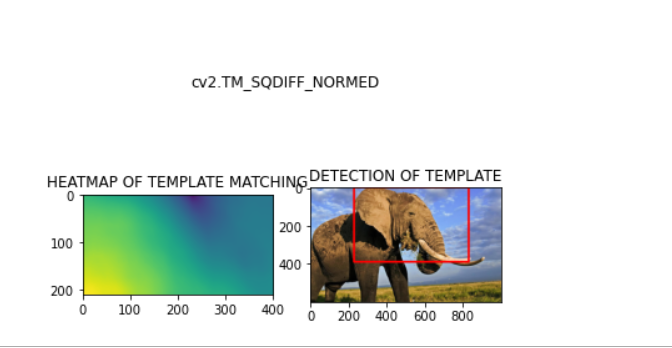

**Corner Detection**

Firstly, an edge in an image is a sudden significant local change in it's brightness. A corner is the meeting (junction) of two edges.

The two corner detection methods, we will explore are

1) Harris Corner Detection: This uses the logic, that corners can be detected by looking for significant change in all directions. There are no changes in the flat regions, and no significant change along the edge.

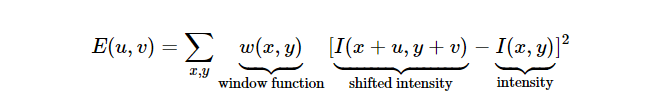

 

I have attached below the further derivations related to Harris Corner Detection. I hope you can understand my handwriting 😶.

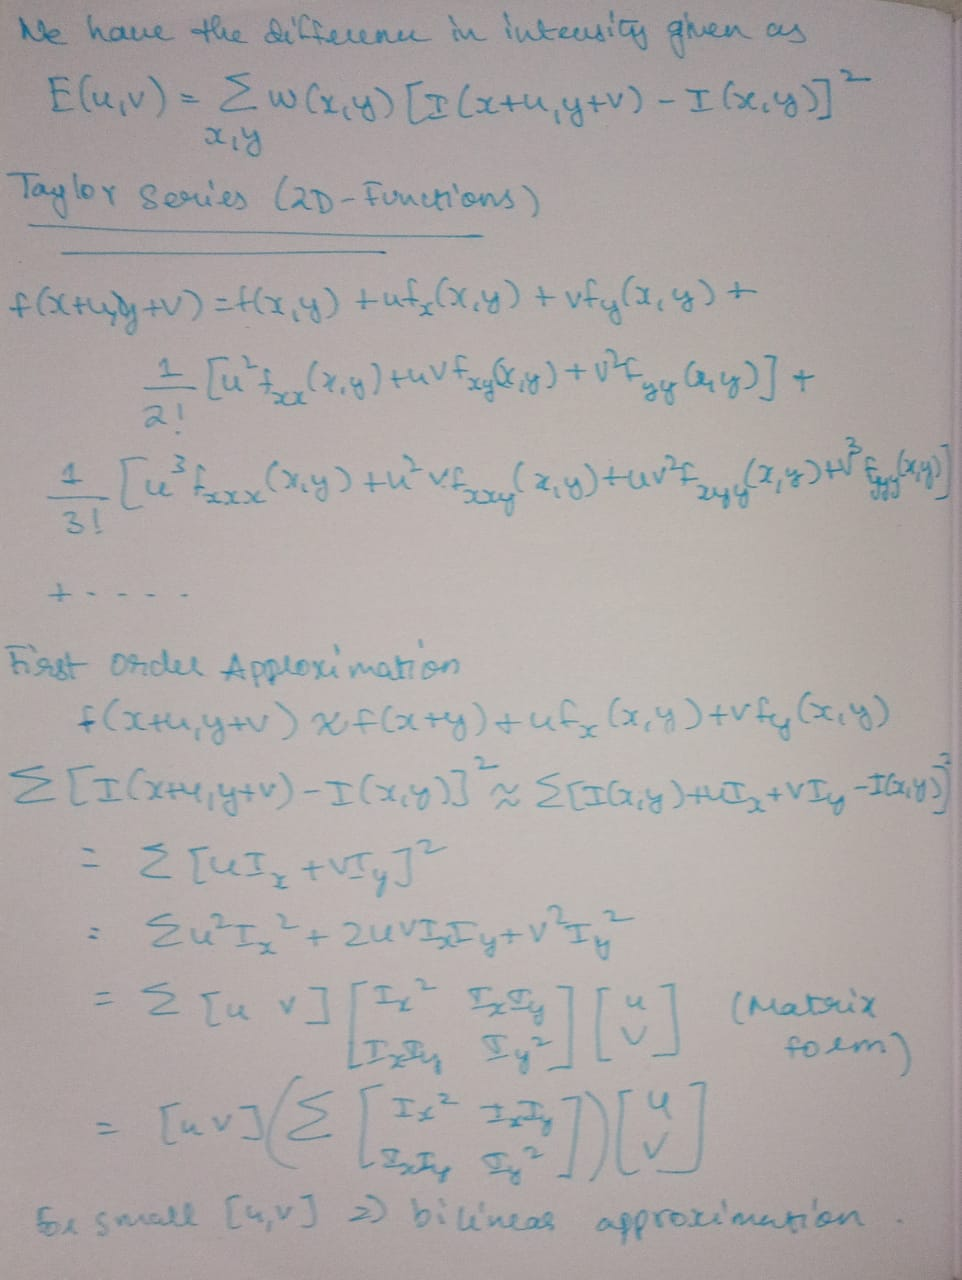

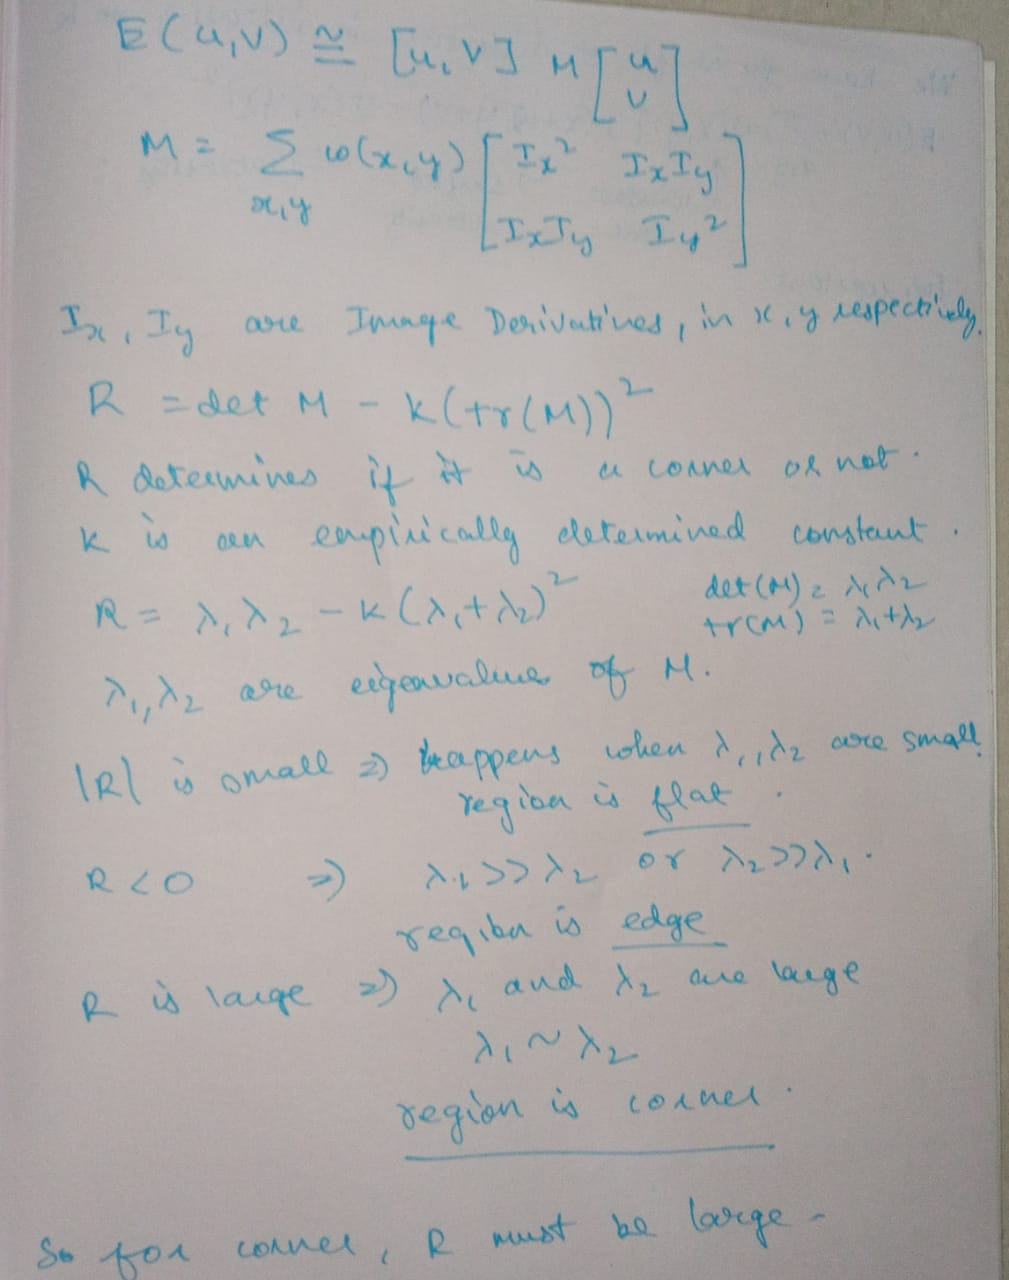

The window function can be considered as a regular weight function.

cv2.cornerHarris(img, blockSize, ksize, k) is for Harris Corner Detection.

img is the input image which should be in grayscale.

blockSize is the size of the neighbourhood which is considered for corner detection.

ksize is the aperture parameter of the Sobel derivative used.

k is the constant we get in the above derivation.

Basically R determines if it is an edge or not. The window function can be either a rectangular function or a gaussian function.

Also Ix and Iy are the image derivatives in the direction of x and y directions respectively. These directional image derivatives can be found out by using cv2.Sobel(). The derivatives are computed using an extended Sobel operator (a.k.a Sobel filter). 

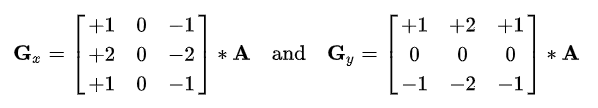

For detailed theory on the Sobel filter: https://en.wikipedia.org/wiki/Sobel_operator

2) Shi-Tomasi Corner Detection: It's essentially like Harris Corner Detection, but it changes the scoring function i.e, R. So R=min(lamda1,lambda2) for Shi-Tomasi detection.

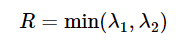

To get a better picture, we can check the implementation using a chess board.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

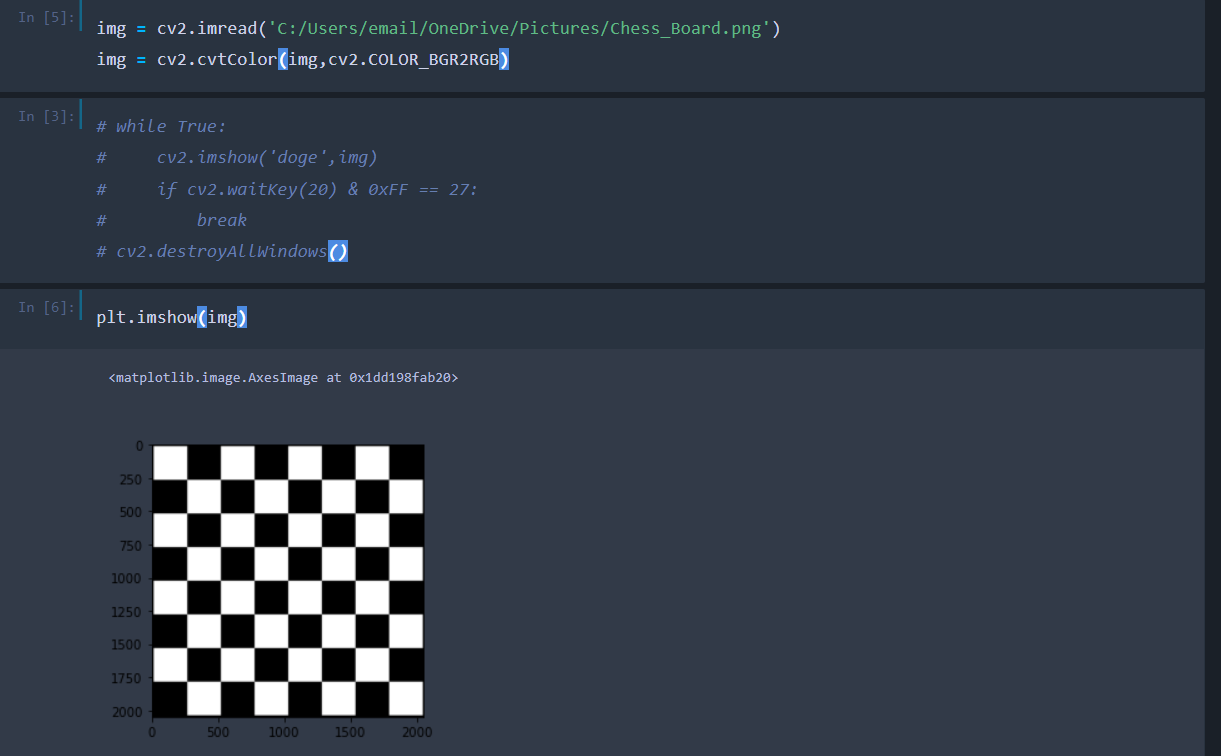

Now, let's change it to grayscale.

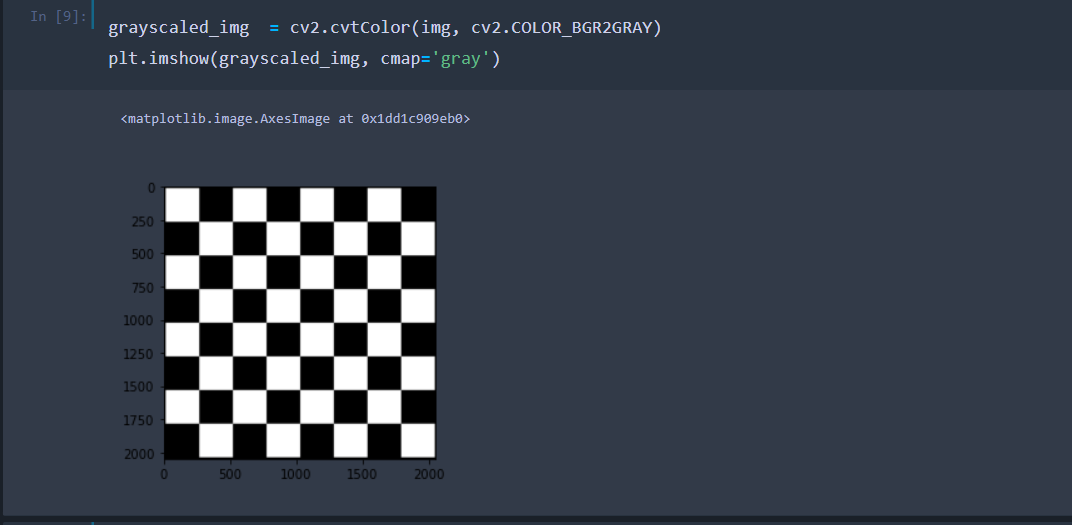

We also will do the corner detection for a realistic chessboard, in which there will be many more corners than the flat chessboard due to the presence of the chess pieces.

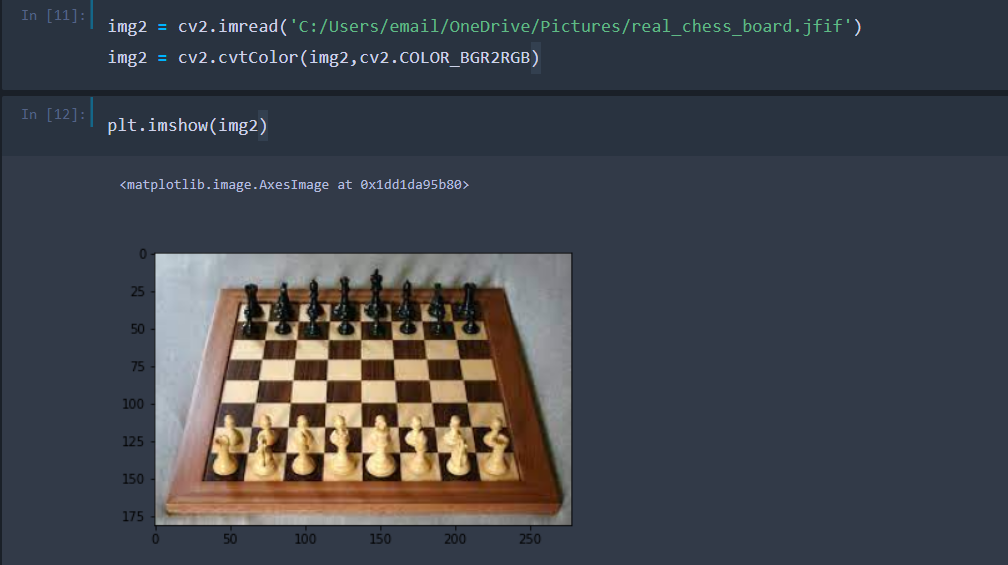

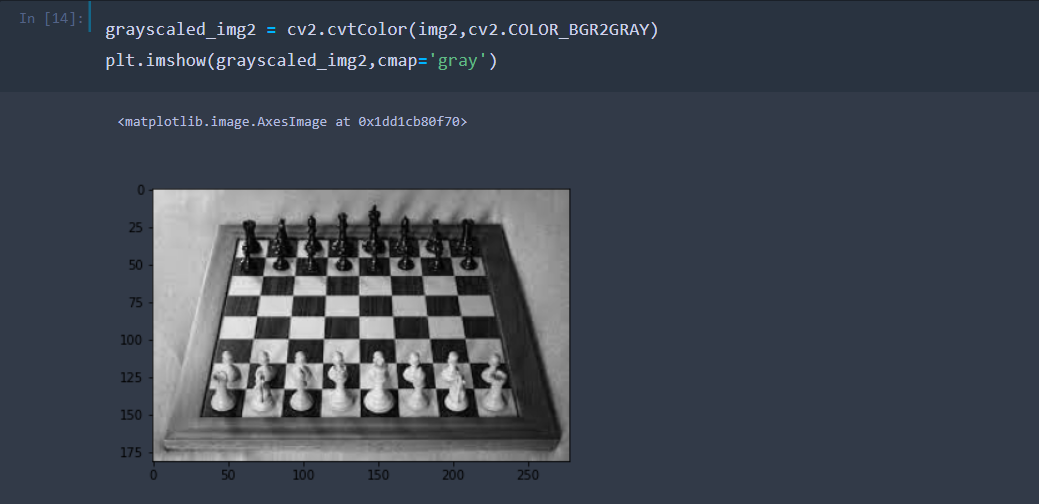

We convert the data type from uint8 to float32.

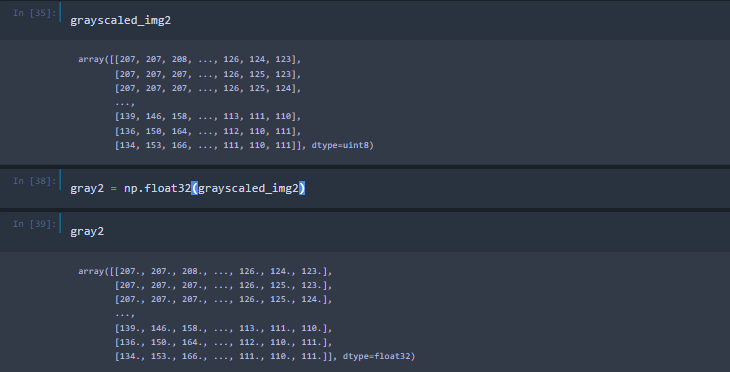

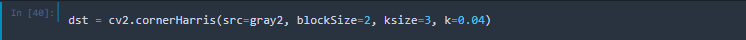

We dilate the result to mark the corner points, using cv2.Dilate.

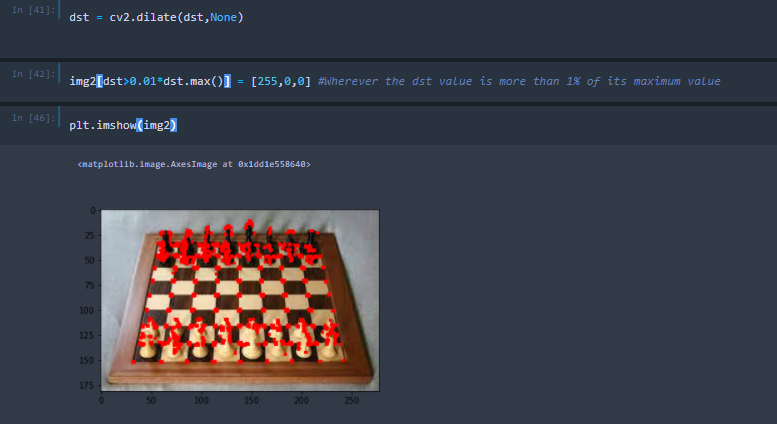

**Shi-Tomasi Corner Detection**

In the above section (Harris Corner Detection), I have mentioned that Shi-Tomasi is almost the same as Harris, but it uses a different R.

We use cv2.goodFeaturesToTrack(image, corners, qualityLevel, minDistance)

image ---> grayscaled image of integer type

corners ---> Maximmum number of corners we want to get (To get all the corners found keep this parameter as -1).

qualityLevel ---> Parameter characterizing the minimal accepted quality of image corners. It's the minimal eigenvale or the Harris function response.

minDistance ---> Minimum possible Euclidean distance between two corners. 

Let's explore this using the same chessboard as we used above!

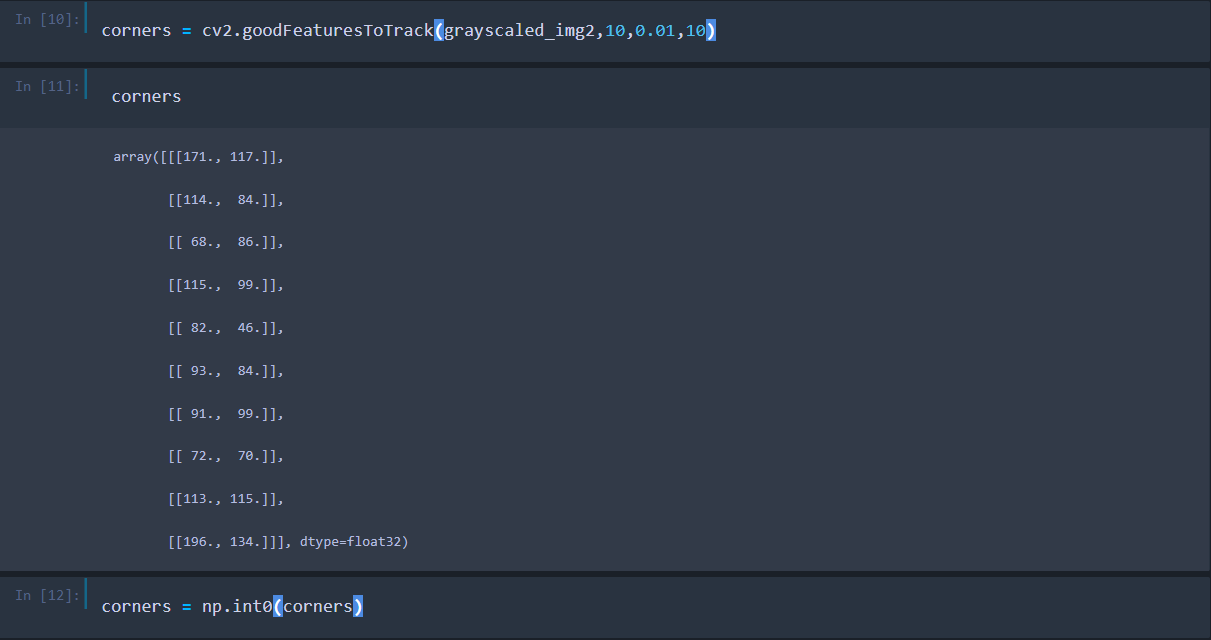

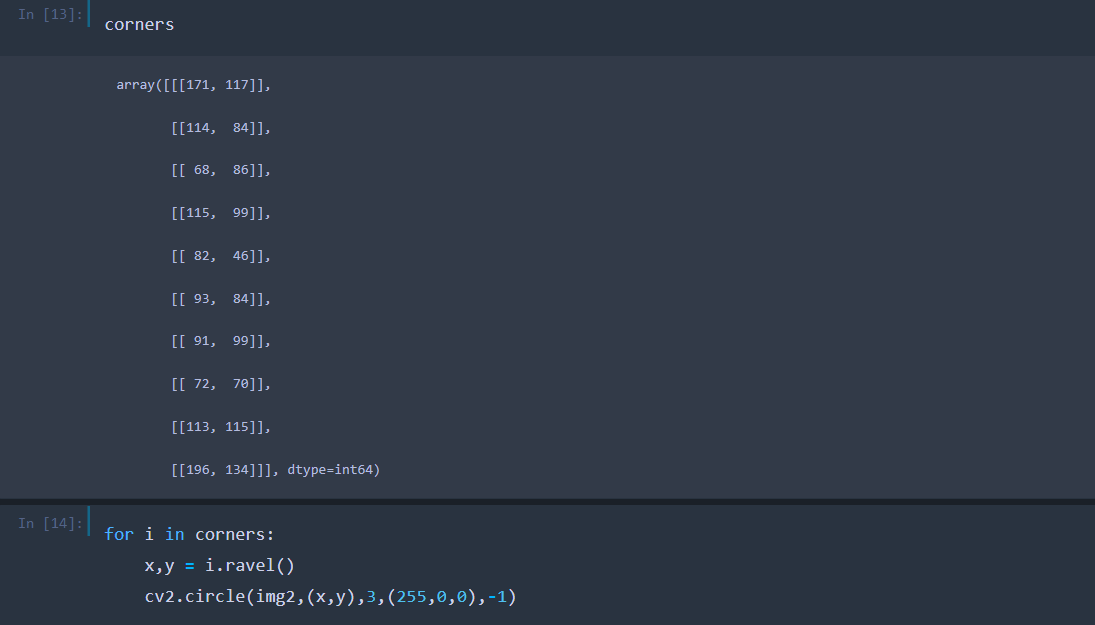

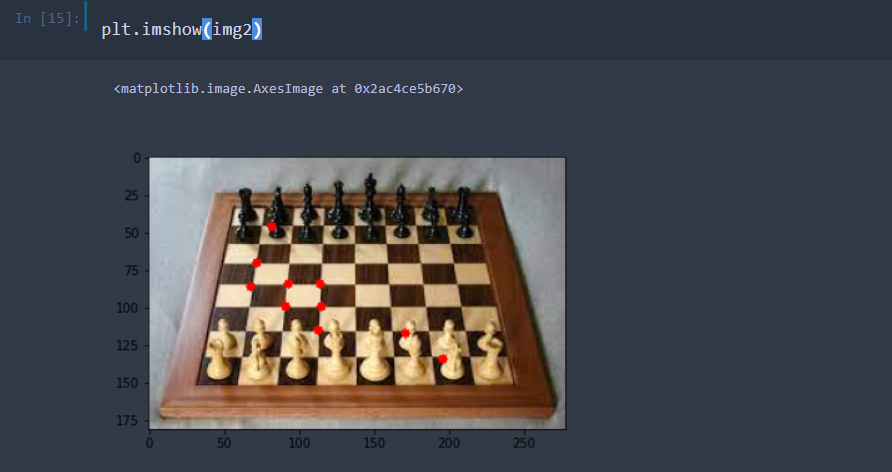